In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    import warnings
    warnings.filterwarnings('ignore')

In [2]:
# read the datasets

df = pd.read_csv('housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
print(df.shape)
df.info()

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Visualization

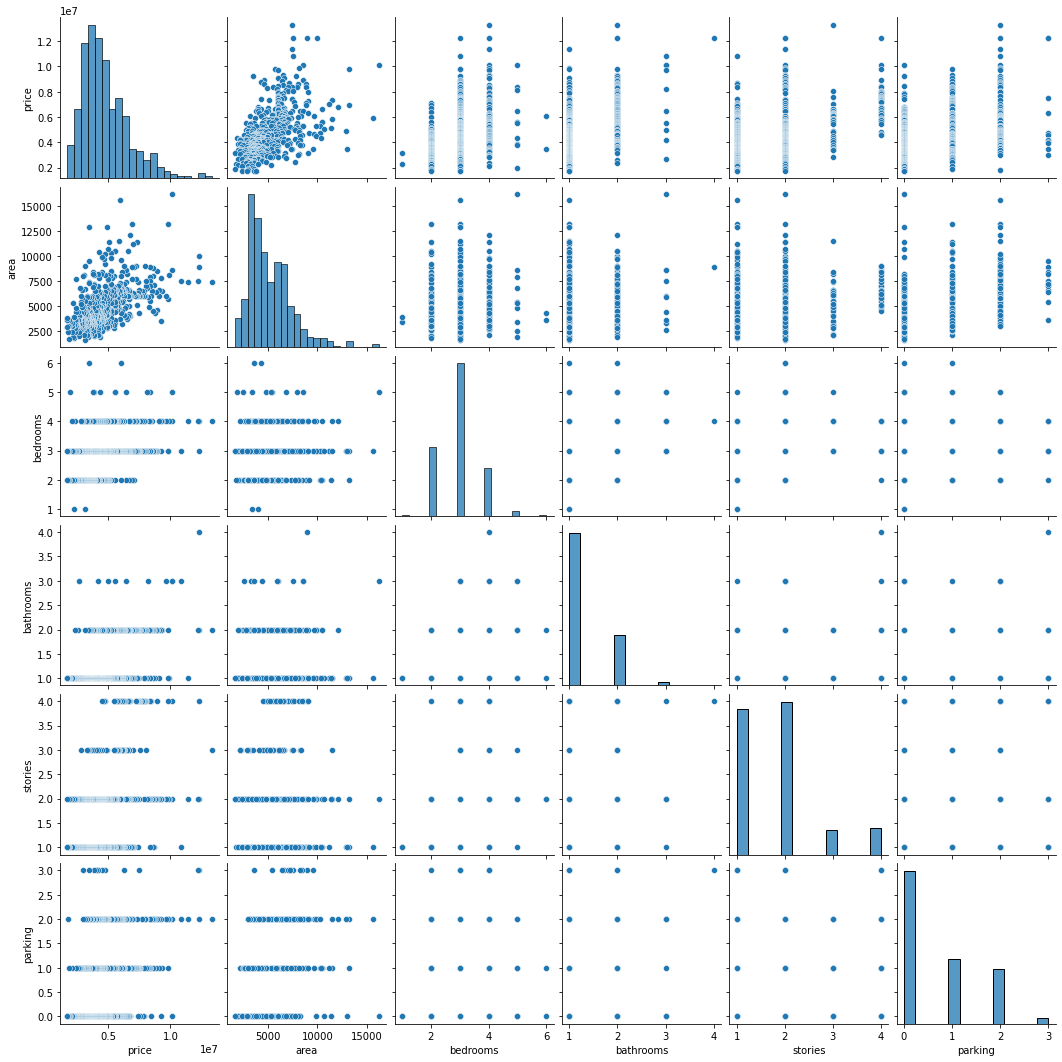

In [5]:
# Visualising Numerical Variables

sns.pairplot(data = df)
plt.show()

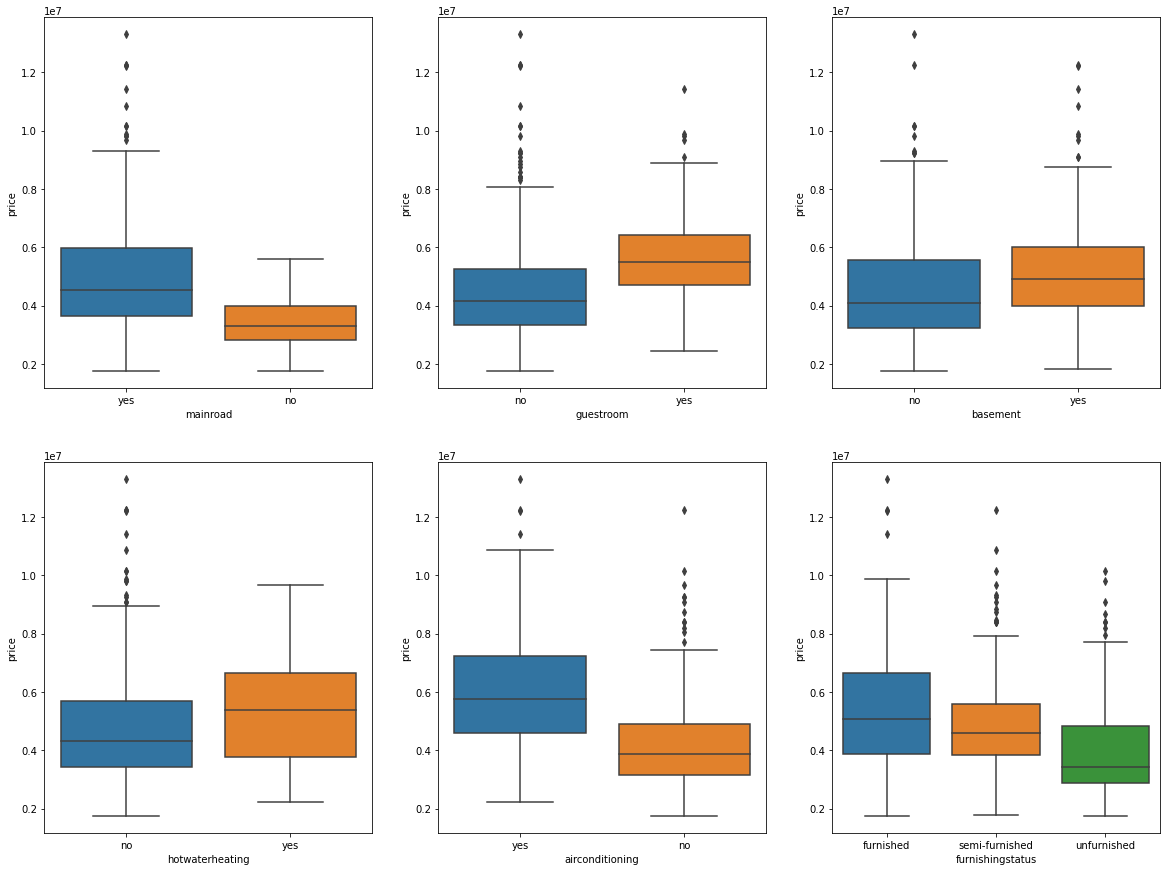

In [6]:
# Visualising Categorical variables

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y='price', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='price', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='basement', y='price', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='price', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=df)

plt.show()

### Data Preparation

In [7]:
#Encoding (Converting categorical to numerical)

# yes/No variables
varlist = ['mainroad', 'guestroom', 'airconditioning', 'hotwaterheating', 'prefarea', 'basement']
df[varlist] = df[varlist].apply(lambda x : x.map({'yes':1, 'no':0}))
df[varlist].head()

,mainroad,guestroom,airconditioning,hotwaterheating,prefarea,basement
0,1,0,1,0,1,0
1,1,0,1,0,0,0
2,1,0,0,0,1,1
3,1,0,1,0,1,1
4,1,1,1,0,0,1


In [8]:
# more than 2 level variables
# Create Dummy variables for furnishingstatus

status = pd.get_dummies(df.furnishingstatus)
status.head()


,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [9]:
# The same information can be denoted by two variables 
#dropiing redundant dummy var
status = pd.get_dummies(df.furnishingstatus, drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [10]:
# Concate the dummy df with original
df = pd.concat([df, status], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [11]:
df = df.drop('furnishingstatus', axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Splitting the train test

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [14]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Rescaling the features

In [15]:
#import min max scalar
from sklearn.preprocessing import MinMaxScaler

In [16]:
# 1. Instantiate an Object
scaler = MinMaxScaler()

#create a list of num var
num_vars = ['area', 'bedrooms','bathrooms','stories','parking','price']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars]

,area,bedrooms,bathrooms,stories,parking,price
359,0.155227,0.4,0.0,0.000000,0.333333,0.169697
19,0.403379,0.4,0.5,0.333333,0.333333,0.615152
159,0.115628,0.4,0.5,0.000000,0.000000,0.321212
35,0.454417,0.4,0.5,1.000000,0.666667,0.548133
28,0.538015,0.8,0.5,0.333333,0.666667,0.575758
...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,0.000000,0.048485
53,0.291623,0.4,0.5,1.000000,0.666667,0.484848
350,0.139388,0.2,0.0,0.333333,0.333333,0.175758
79,0.366420,0.4,0.5,0.666667,0.000000,0.424242


In [17]:
df_train[num_vars].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.288710,0.386352,0.136483,0.268591,0.242345,0.260333
std,0.181420,0.147336,0.237325,0.295001,0.285933,0.157607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155227,0.200000,0.000000,0.000000,0.000000,0.151515
50%,0.234424,0.400000,0.000000,0.333333,0.000000,0.221212
75%,0.398099,0.400000,0.500000,0.333333,0.333333,0.345455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

<AxesSubplot:>

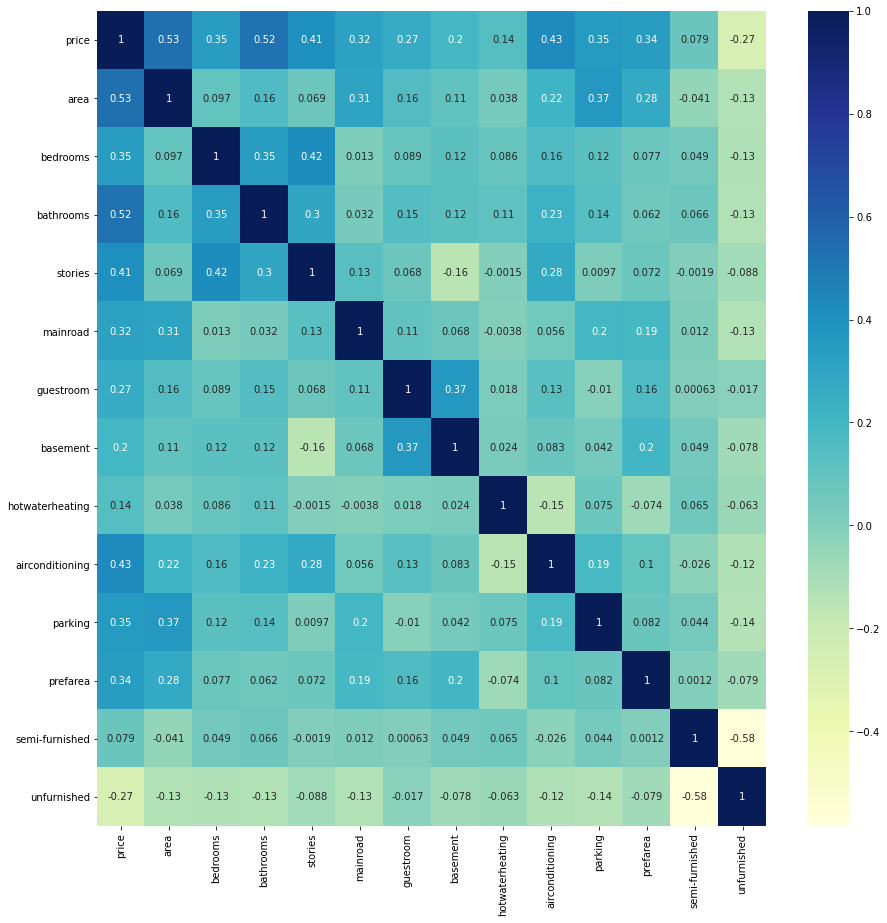

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)

In [19]:
# Creting X and y
y_train = df_train.pop('price')
X_train = df_train

In [20]:
# the most corelated variable is area so we will consider the var first
# we will check statistical significance of var
# we will also check VIF to get correlation between vars

import statsmodels.api as sm

### Forward Selection

In [21]:
#add constant
X_train_sm = sm.add_constant(X_train['area'])
#print(X_train_sm.head())

#First Model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [22]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           3.15e-29
Time:                        20:17:52   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Add another variable bathrooms
X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()

,const,area,bathrooms
359,1.0,0.155227,0.0
19,1.0,0.403379,0.5
159,1.0,0.115628,0.5
35,1.0,0.454417,0.5
28,1.0,0.538015,0.5


In [24]:
# 2nd Model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [25]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.51e-54
Time:                        20:17:52   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#3rd Model
# Add another variable bathrooms
X_train_sm = X_train[['area','bathrooms','bedrooms']]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()

,const,area,bathrooms,bedrooms
359,1.0,0.155227,0.0,0.4
19,1.0,0.403379,0.5,0.4
159,1.0,0.115628,0.5,0.4
35,1.0,0.454417,0.5,0.4
28,1.0,0.538015,0.5,0.8


In [27]:
# 2nd Model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           3.12e-57
Time:                        20:17:52   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The above method is manual where we pick a var and add and build a new model and check summary
##### We will add all variables now and remove accordingly based on backward selection

### Backward Selection

In [28]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [29]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           8.83e-83
Time:                        20:17:52   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We will check p-value and drop var with high p_value(significance)
##### VIF

In [30]:
# Calculate the VIF for all variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


##### We could have
- High p-value, High VIF
- High p-value, Low VIF  (remove First; build model; Check again)
- Low p-value, High VIF (remove after above)

In [32]:
# Remove a var and build a model again
X = X_train.drop('semi-furnished', axis=1)

In [33]:
X_train_sm = sm.add_constant(X)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [34]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.07e-83
Time:                        20:17:53   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [36]:
# Now Again remove bedrooms as it has high VIF and High p-value
X = X.drop('bedrooms', axis=1)

In [37]:
X_train_sm = sm.add_constant(X)
X_train_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,1.0,0.403379,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,1.0,0.115628,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,1.0,0.538015,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [38]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.73e-84
Time:                        20:17:53   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


## Residual Analysis

In [40]:
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

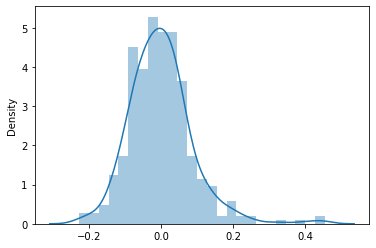

In [41]:
res = y_train - y_train_pred
sns.distplot(res)

### Prediction and Evaluation

In [42]:
# 1. Instantiate an Object

#create a list of num var
num_vars = ['area', 'bedrooms','bathrooms','stories','parking','price']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars]

,area,bedrooms,bathrooms,stories,parking,price
265,0.091869,0.4,0.0,0.333333,0.000000,0.229697
54,0.366420,0.4,0.5,0.333333,0.333333,0.484848
171,0.742080,0.4,0.0,0.000000,0.333333,0.303030
244,0.306582,0.4,0.0,0.333333,0.000000,0.242424
268,0.274023,0.6,0.0,0.333333,0.000000,0.227879
...,...,...,...,...,...,...
413,0.010032,0.4,0.5,0.333333,0.000000,0.145455
191,0.780007,0.4,0.0,0.333333,0.000000,0.284848
310,0.365100,0.4,0.0,0.000000,0.000000,0.206061
46,0.366420,0.4,0.5,1.000000,0.333333,0.500000


In [43]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
y_test = df_test.pop('price')
X_test = df_test

In [45]:
# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [46]:
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'], axis=1)
X_test_sm

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.010032,0.5,0.333333,1,0,1,0,0,0.000000,1,1
191,1.0,0.780007,0.0,0.333333,1,1,1,0,0,0.000000,0,0
310,1.0,0.365100,0.0,0.000000,1,0,1,0,0,0.000000,0,0
46,1.0,0.366420,0.5,1.000000,1,0,0,0,1,0.333333,0,0


In [47]:
#Predict
y_test_pred = lr_model.predict(X_test_sm)

In [48]:
#Evaluate
from sklearn.metrics import r2_score

R2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(R2)

0.6713505684480789


# Variable Selection using RFE

In [51]:
print(X_train.shape)
print(y_train.shape)

(381, 13)
(381,)


In [52]:
#Use model using SKlearn

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
LM = LinearRegression()
LM.fit(X_train,y_train)

LinearRegression()

In [55]:
#Using RFE to select 10 variables out og 13
rfe = RFE(LM, 10)
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [57]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

### Build a Model using Stats Model now

In [58]:
X_train_rfe = X_train[col]

In [59]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.118268,0.2,0.0,0.000000,1,0,0,0,0.000000,0
53,1.0,0.291623,0.4,0.5,1.000000,1,0,0,1,0.666667,0
350,1.0,0.139388,0.2,0.0,0.333333,1,0,1,0,0.333333,0
79,1.0,0.366420,0.4,0.5,0.666667,1,1,0,1,0.000000,0


In [60]:
lm = sm.OLS(y_train, X_train_rfe).fit() 

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.28e-82
Time:                        20:24:02   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

In [63]:
X_train_new = X_train_rfe.drop(['bedrooms'],axis=1)

In [66]:
lm = sm.OLS(y_train, X_train_new).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           6.67e-83
Time:                        20:26:26   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

In [67]:
X_train_new.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

Text(0, 0.5, 'y_pred')

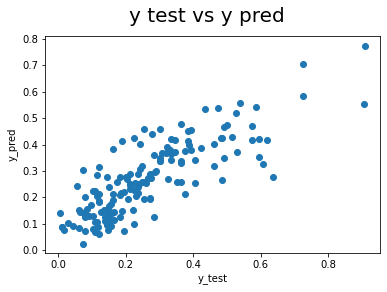

In [72]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y test vs y pred', fontsize = 20)
plt.xlabel('y_test')
plt.ylabel('y_pred')
